## Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/Data_Analytics"
!pip install imbalanced-learn scikit-learn matplotlib seaborn pandas

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [3]:
file_path = f"{project_path}/Dataset/dataset_kotor.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211833 entries, 0 to 211832
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   id                                                                  211833 non-null  int64  
 1   Age (y)                                                             211833 non-null  int64  
 2   Gender(1, male; 2, female)                                          211833 non-null  int64  
 3   site                                                                211833 non-null  int64  
 4   height(cm)                                                          211831 non-null  float64
 5   weight(kg)                                                          211833 non-null  float64
 6   BMI(kg/m2)                                                          211833 non-null  float64
 7   SB

## Cleaning

In [4]:
df_cleaned = df.drop(
    columns=[
        "id",
        "site",
        "height(cm)",
        "weight(kg)",
        "year of followup",
        "censor of diabetes at followup(1, Yes; 0, No)",
    ]
)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211833 entries, 0 to 211832
Data columns (total 19 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Age (y)                                                             211833 non-null  int64  
 1   Gender(1, male; 2, female)                                          211833 non-null  int64  
 2   BMI(kg/m2)                                                          211833 non-null  float64
 3   SBP(mmHg)                                                           211810 non-null  float64
 4   DBP(mmHg)                                                           211809 non-null  float64
 5   FPG (mmol/L)                                                        211833 non-null  float64
 6   Cholesterol(mmol/L)                                                 206979 non-null  float64
 7   Tr

In [5]:
new_column_names = {
    "Age (y)": "Age",
    "Gender(1, male; 2, female)": "Gender",
    "BMI(kg/m2)": "BMI",
    "SBP(mmHg)": "SBP",
    "DBP(mmHg)": "DBP",
    "FPG (mmol/L)": "FPG",
    "Cholesterol(mmol/L)": "Chol",
    "Triglyceride(mmol/L)": "Tri",
    "HDL-c(mmol/L)": "HDL",
    "LDL(mmol/L)": "LDL",
    "ALT(U/L)": "ALT",
    "AST(U/L)": "AST",
    "BUN(mmol/L)": "BUN",
    "CCR(umol/L)": "CCR",
    "FPG of final visit(mmol/L)": "FFPG",
    "Diabetes diagnosed during followup（1,Yes）": "Diabetes",
    "smoking status(1,current smoker;2, ever smoker;3,never smoker)": "Smoking",
    "drinking status(1,current drinker;2, ever drinker;3,never drinker)": "Drinking",
    "family histroy of diabetes(1,Yes;0,No)": "Family_history",
}

df_cleaned.rename(columns=new_column_names, inplace=True)

new_order = [
    "Age", "Gender", "BMI", "SBP", "DBP", "FPG", "Chol", "Tri", "HDL", "LDL",
    "ALT", "AST", "BUN", "CCR", "FFPG", "Smoking", "Drinking", "Family_history", "Diabetes"
]

df_cleaned = df_cleaned[new_order]
df_cleaned['Gender'] = df_cleaned['Gender'].replace({1: 0, 2: 1})
df_cleaned['Drinking'] = df_cleaned['Drinking'].replace({1: 0, 2: 1, 3: 2})
df_cleaned['Smoking'] = df_cleaned['Smoking'].replace({1: 0, 2: 1, 3: 2})

print(df_cleaned.head())

   Age  Gender   BMI    SBP   DBP   FPG  Chol   Tri   HDL   LDL   ALT   AST  \
0   43       1  19.3   96.0  57.0  4.99  5.13  0.78   NaN   NaN  10.0   NaN   
1   34       0  20.0  124.0  69.0  3.51  4.61  1.75  1.09  3.13  29.1   NaN   
2   32       1  20.7   98.0  68.0  4.25  4.73  0.47   NaN   NaN   6.9  19.5   
3   59       0  23.1  136.0  73.0  5.70  4.50  0.75  1.53  2.80  15.0   NaN   
4   30       1  18.1  107.0  76.0  4.42  3.48  0.52  1.55  1.43  12.0  19.9   

    BUN   CCR  FFPG  Smoking  Drinking  Family_history  Diabetes  
0  3.08  50.3  4.97      2.0       2.0               1       NaN  
1  6.13  83.7  5.50      NaN       NaN               0       NaN  
2  4.45  42.8  4.90      NaN       NaN               0       NaN  
3  5.76  62.6  5.50      2.0       2.0               0       NaN  
4  2.51  48.9  4.82      NaN       NaN               0       NaN  


In [6]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211833 entries, 0 to 211832
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             211833 non-null  int64  
 1   Gender          211833 non-null  int64  
 2   BMI             211833 non-null  float64
 3   SBP             211810 non-null  float64
 4   DBP             211809 non-null  float64
 5   FPG             211833 non-null  float64
 6   Chol            206979 non-null  float64
 7   Tri             206946 non-null  float64
 8   HDL             117271 non-null  float64
 9   LDL             118412 non-null  float64
 10  ALT             210051 non-null  float64
 11  AST             88543 non-null   float64
 12  BUN             190282 non-null  float64
 13  CCR             200658 non-null  float64
 14  FFPG            211814 non-null  float64
 15  Smoking         60230 non-null   float64
 16  Drinking        60230 non-null   float64
 17  Family_his

In [7]:
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
BMI,0
SBP,23
DBP,24
FPG,0
Chol,4854
Tri,4887
HDL,94562
LDL,93421


In [8]:
df_cleaned["Diabetes"].fillna(0, inplace=True)
df_cleaned['Diabetes'] = df_cleaned['Diabetes'].astype('int64')

<ipython-input-8-4d9151b94b6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Diabetes"].fillna(0, inplace=True)


In [9]:
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
BMI,0
SBP,23
DBP,24
FPG,0
Chol,4854
Tri,4887
HDL,94562
LDL,93421


Diabetes
0    12522
1     1304
Name: count, dtype: int64


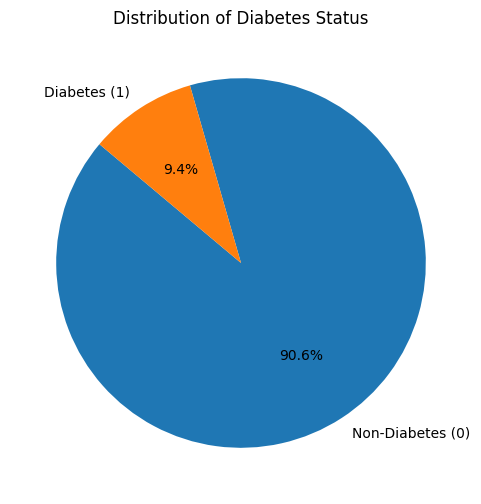

In [10]:
df_cleaned = pd.concat([
    df_cleaned[df_cleaned["Diabetes"] == 0].dropna(),
    df_cleaned[df_cleaned["Diabetes"] == 1]
], ignore_index=True)

print(df_cleaned["Diabetes"].value_counts())

df_cleaned["Diabetes"].value_counts().plot(
    kind="pie",
    labels=['Non-Diabetes (0)', 'Diabetes (1)'],
    autopct='%1.1f%%',
    startangle=140,
    figsize=(6,6),
    title='Distribution of Diabetes Status'
)
plt.ylabel('')
plt.show()

### Mean / Median?

In [11]:
X = df_cleaned.drop('Diabetes', axis=1)
y = df_cleaned['Diabetes']

imputer_mean = SimpleImputer(strategy='mean')
X_mean = pd.DataFrame(imputer_mean.fit_transform(X), columns=X.columns)
X_train_mean, X_test_mean, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, random_state=42)
model_mean = RandomForestClassifier(random_state=42)
score_mean = cross_val_score(model_mean, X_train_mean, y_train, cv=5).mean()


imputer_median = SimpleImputer(strategy='median')
X_median = pd.DataFrame(imputer_median.fit_transform(X), columns=X.columns)
X_train_median, X_test_median, y_train, y_test = train_test_split(X_median, y, test_size=0.2, random_state=42)
model_median = RandomForestClassifier(random_state=42)
score_median = cross_val_score(model_median, X_train_median, y_train, cv=5).mean()

print(f'Model Score (Mean Imputation): {score_mean:.4f}')
print(f'Model Score (Median Imputation): {score_median:.4f}')


Model Score (Mean Imputation): 0.9868
Model Score (Median Imputation): 0.9650


In [12]:
df_diabetes_1 = df_cleaned[df_cleaned['Diabetes'] == 1.0].copy()
num_cols = ["Age", "BMI", "SBP", "DBP", "FPG", "Chol", "Tri", "HDL", "LDL", "ALT", "AST", "BUN", "CCR", "FFPG"]
for col in num_cols:
    mean_value = df_diabetes_1[col].mean()
    df_diabetes_1[col] = df_diabetes_1[col].fillna(mean_value)

cat_cols = ["Smoking", "Drinking"]
for col in cat_cols:
    mode_value = df_diabetes_1[col].mode()[0]
    df_diabetes_1[col] = df_diabetes_1[col].fillna(mode_value)


df_cleaned.loc[df_cleaned['Diabetes'] == 1.0, num_cols] = df_diabetes_1[num_cols].round(2).values
df_cleaned.loc[df_cleaned['Diabetes'] == 1.0, cat_cols] = df_diabetes_1[cat_cols].values

print(df_cleaned['Diabetes'].value_counts())
print(df_cleaned.isnull().sum())

Diabetes
0    12522
1     1304
Name: count, dtype: int64
Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
AST               0
BUN               0
CCR               0
FFPG              0
Smoking           0
Drinking          0
Family_history    0
Diabetes          0
dtype: int64


In [13]:
print(df_diabetes_1.describe())

               Age       Gender          BMI          SBP          DBP  \
count  1304.000000  1304.000000  1304.000000  1304.000000  1304.000000   
mean     59.680215     0.356595    25.346764   130.717791    79.195552   
std      12.192610     0.479178     3.340722    19.422715    11.861348   
min      26.000000     0.000000    16.400000    83.000000    45.000000   
25%      52.750000     0.000000    23.100000   117.000000    70.000000   
50%      60.000000     0.000000    25.200000   130.000000    78.000000   
75%      67.000000     1.000000    27.400000   142.250000    87.000000   
max      91.000000     1.000000    45.800000   200.000000   134.000000   

               FPG         Chol          Tri          HDL          LDL  \
count  1304.000000  1304.000000  1304.000000  1304.000000  1304.000000   
mean      5.836695     5.037651     1.880016     1.280224     2.908812   
std       0.794619     0.937682     1.285523     0.238588     0.591064   
min       1.780000     2.120000     0

In [14]:
X = df_cleaned.drop('Diabetes', axis=1)
y = df_cleaned['Diabetes']

# Split data menjadi training (70%) dan sementara (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Karena 20% dari total = 2/3 dari sementara, dan 10% dari total = 1/3 dari sementara
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

# Terapkan SMOTE hanya pada training set untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

def create_dataframe(X, y, dataset_name):
    df = pd.DataFrame(X, columns=X.columns)
    df["Diabetes"] = y.values
    df["dataset"] = dataset_name
    return df

train_df = create_dataframe(X_train_resampled, y_train_resampled, "train")
val_df = create_dataframe(X_val, y_val, "validation")
test_df = create_dataframe(X_test, y_test, "test")

df_cleaned = pd.concat([train_df, val_df, test_df], ignore_index=True)

df_cleaned["Smoking"] = df_cleaned["Smoking"].astype("int64")
df_cleaned["Drinking"] = df_cleaned["Drinking"].astype("int64")

print("\nDistribusi data per subset:")
print(df_cleaned["dataset"].value_counts())

print("\nDistribusi Diabetes per subset:")
print(df_cleaned.groupby("dataset")["Diabetes"].value_counts())


Distribusi data per subset:
dataset
train         17530
validation     2765
test           1383
Name: count, dtype: int64

Distribusi Diabetes per subset:
dataset     Diabetes
test        0           1253
            1            130
train       0           8765
            1           8765
validation  0           2504
            1            261
Name: count, dtype: int64


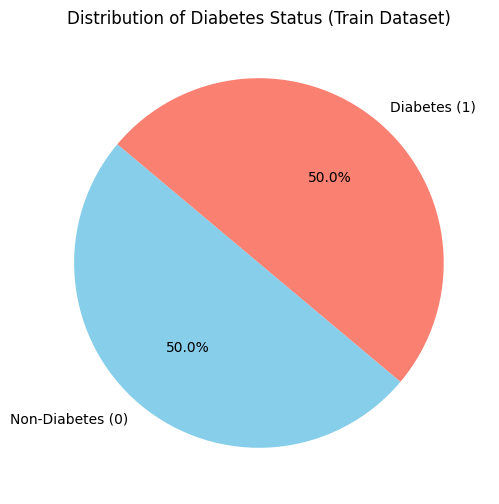

In [15]:
# Filter hanya dataset train
df_train_only = df_cleaned[df_cleaned['dataset'] == 'train']

# Hitung distribusi Diabetes hanya di train
diabetes_counts = df_train_only["Diabetes"].value_counts()

labels = ['Non-Diabetes (0)', 'Diabetes (1)']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(
    diabetes_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Distribution of Diabetes Status (Train Dataset)')
plt.show()


In [16]:
df_cleaned.to_csv(f"{project_path}/Dataset/dataset_cleaned_oversampling.csv", index=False, float_format="%.2f", encoding="utf-8")